# 0. 準備運動


まずは Python と jupyter の使い方に慣れるために，簡単なものをいくつかやってみよう．


## Python でサイコロ

確率・統計と言えばサイコロ．Pythonでは0以上1未満の浮動小数点を生成する `random()` を使って作ることができる．例えば20回サイコロを振るには下のように書ける．`for`ループの書き方などが他の言語とちょっと違い，`foreach` に近い．

In [2]:
import random
import math

for i in range(20):
    r = math.ceil(6 * random.random())
    print(r, end=" ")

print()

4 4 1 4 2 1 3 2 2 4 4 1 6 1 2 2 3 3 2 2 


さて，このサイコロはまともなサイコロだろうか？ 出る目が偏っていないか，_N_回振って確認してみよう．Python には `printf` がない．Python 的には `str.format()` を使うのが推奨なのだが，`printf`的な書き方をすることにする．フォーマット文字列と変数リストの区切りが `%` なことに注意．

In [4]:
N = 100000
count = [0,0,0,0,0,0]

for i in range(N):
    count[math.ceil(6 * random.random()) - 1] += 1

for i in range(6):
    print("%d : %d/%d (%.3f)" % (i+1, count[i], N, count[i]/N))

1 : 16787/100000 (0.168)
2 : 16348/100000 (0.163)
3 : 16707/100000 (0.167)
4 : 16824/100000 (0.168)
5 : 16735/100000 (0.167)
6 : 16599/100000 (0.166)


$N=100$では結構偏っているようだが，回数を増やせばすべての目の出現確率は 1/6 = 0.1666... に収束するはずだ．(実は乱数が**ちゃんとランダムか**，というのは非常に重要な問題なのだが，さしあたりここは Python の `random()` は十分に「ちゃんとした」乱数列を発生させていると信じることにしよう．詳しくは付録1を参照．)

## Python: グラフを描く

Python では`matplotlib`を使って様々なグラフを描くことができる．試行回数を増やしていった際に1がでる確率がどのように変わるかをプロットしてみよう．


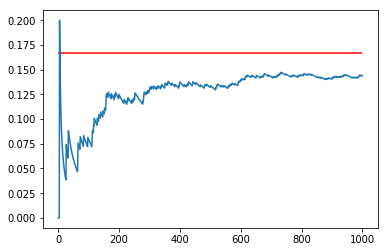

<Figure size 432x288 with 0 Axes>

In [10]:
from matplotlib import pyplot

Nmax = 1000
count = 0
x = []
y = []

for i in range(Nmax):
    if math.ceil(6 * random.random()) == 1:
        count += 1
    x.append(i+1)
    y.append(count/(i+1))

pyplot.hlines([1/6], 0, Nmax, "red")
pyplot.plot(x,y)
pyplot.show()
pyplot.clf()


どうやらちゃんと 0.1666... に収束しているようだが，10000回振っても結構ずれていることが分かる．(実行するたびに結果が変わるので何度か実行してみよう．)

## Python: ファイルの読み込み

この実習ではサンプルデータを読み込んで処理することが多いので，その練習をしておこう．屋久島の降水量 (気象庁提供) を読み込んでヒストグラムを表示してみる．

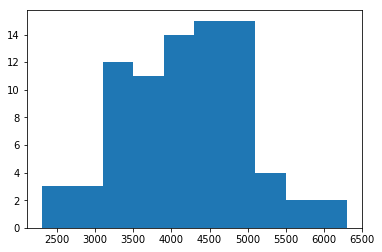

In [11]:
import re

rain_data = open("./dat/yakushima-rain-year.txt", "r")

x = []
y = []

for line in rain_data:
    if re.match(r"^\s+$", line):
        continue
    tmp = line.split()
    x.append(int(tmp[0]))
    y.append(float(tmp[1]))

rain_data.close()
    
pyplot.hist(y)
pyplot.show()

このぐらいなら上のように書いてもいいのだが，配列操作や統計用の豊富なメソッドが使える`numpy`を使うのが簡単である．ヒストグラムの作成は，`numpy` を使うと以下のようにずいぶん簡単に書ける．ファイルのオープンなどなしで`loadtxt()` だけで読み込みができ，`unpack`オプションで行と列の転置も勝手にやってくれる．ついでに平均を求める `mean()` を使って平均値もすぐに求まる．

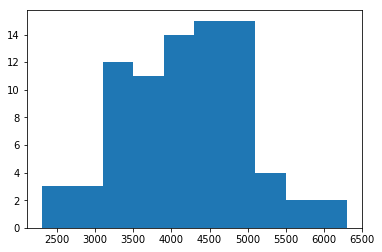

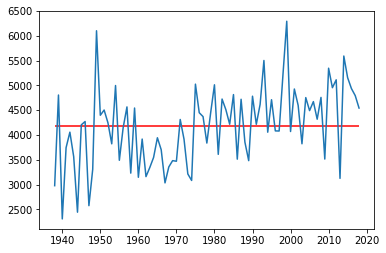

Average = 4180.6


In [12]:
import numpy as np

x,y = np.loadtxt("./dat/yakushima-rain-year.txt", unpack=True)

pyplot.hist(y)
pyplot.show()

pyplot.hlines([y.mean()], 1938, 2018, "red")
pyplot.plot(x,y)
pyplot.show()

print("Average = %.1f" % y.mean())

ところで東京都の平年降水量は1528.8 mm (1981年～2010年 の30年統計)である．屋久島は「1ヶ月35日は雨が降る」と言われるが，おおげさではないことが分かる．

## 練習

./dat/yakushima-rain-month.txt に，月別の降水量データがある．年ごとのデータと違って2次元配列になりそうだが，これのヒストグラムを描くコードを書いてみよう．

### ヒント
- 1列目は年なので，ここはいらない．`loadtxt()` で使う列を指定するには`usecols`オプションを使う．読み込む列のリストで指定するので，`range()`が使える．
- 欲しいヒストグラムを得るには `hist()` に1次元配列でデータを渡す必要がある．2次元(多次元)配列を1次元配列にするには `flatten()`メソッドを使う

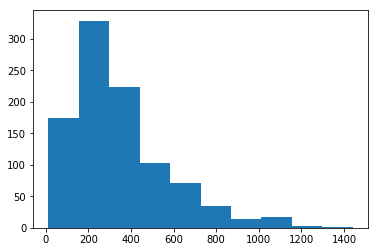

Average = 348.4


In [8]:
data = np.loadtxt("./dat/yakushima-rain-month.txt", usecols=range(1,13))

pyplot.hist(data.flatten())
pyplot.show()

print("Average = %.1f" % data.mean())

これでファイルを読み込んで何らかの処理をする，という基本的なところができるようになったので，準備運動はここまで．